In [26]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
Created on Fri Oct 28 21:46:23 2016

@author: stephen
"""

from __future__ import print_function

from tensorflow import keras
from keras.callbacks import EarlyStopping

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

np.random.seed(813306)


def readucr(filename):
    data = np.loadtxt(filename)
    Y = data[:, 0]
    X = data[:, 1:]
    return X, Y


epochs = 400

flist = ["../../datasets/GunPoint/GunPoint"]

for each in flist:
    fname = each
    x_train, y_train = readucr(fname + "_TRAIN.txt")
    x_test, y_test = readucr(fname + "_TEST.txt")
    nb_classes = len(np.unique(y_test))
    y_train = (
        (y_train - y_train.min()) / (y_train.max() - y_train.min()) * (nb_classes - 1)
    )
    y_test = (y_test - y_test.min()) / (y_test.max() - y_test.min()) * (nb_classes - 1)
    # batch_size = int(min(x_train.shape[0] / 10, 16))
    batch_size = int(x_train.shape[0])

    Y_train = keras.utils.to_categorical(y_train, nb_classes)
    Y_test = keras.utils.to_categorical(y_test, nb_classes)

    x_train_mean = x_train.mean()
    x_train_std = x_train.std()
    x_train = (x_train - x_train_mean) / (x_train_std)

    # x_test_min = np.min(x_test, axis = 1, keepdims=1)
    # x_test_max = np.max(x_test, axis = 1, keepdims=1)
    x_test = (x_test - x_train_mean) / (x_train_std)

    # x_train = x_train.reshape(x_train.shape + (1,))
    # x_test = x_test.reshape(x_test.shape + (1,))

    x = keras.layers.Input(x_train.shape[1:])
    y = keras.layers.Dropout(0.1)(x)
    y = keras.layers.Dense(500, activation="relu")(y)
    y = keras.layers.Dropout(0.2)(y)
    y = keras.layers.Dense(500, activation="relu")(y)
    y = keras.layers.Dropout(0.2)(y)
    y = keras.layers.Dense(500, activation="relu")(y)
    y = keras.layers.Dropout(0.3)(y)
    out = keras.layers.Dense(nb_classes, activation="softmax")(y)

    model = keras.models.Model(inputs=x, outputs=out)

    optimizer = keras.optimizers.Adadelta()
    model.compile(
        loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"]
    )

    reduce_lr = keras.callbacks.ReduceLROnPlateau(
        monitor="loss", factor=0.5, patience=200, min_lr=0.1
    )
    
    es = EarlyStopping(monitor="val_loss", verbose=1, min_delta=0.001, patience=200)

    hist = model.fit(
        x_train,
        Y_train,
        batch_size=batch_size,
        epochs=epochs,
        verbose=1,
        validation_data=(x_test, Y_test),
        callbacks=[reduce_lr, es],
    )


Epoch 1/400
1/1 [==============================] - 1s 1s/step - loss: 0.7469 - accuracy: 0.3600 - val_loss: 0.7016 - val_accuracy: 0.4867 - lr: 0.0010
Epoch 2/400
1/1 [==============================] - 0s 86ms/step - loss: 0.6926 - accuracy: 0.5800 - val_loss: 0.7013 - val_accuracy: 0.4867 - lr: 0.0010
Epoch 3/400
1/1 [==============================] - 0s 85ms/step - loss: 0.7813 - accuracy: 0.4600 - val_loss: 0.7011 - val_accuracy: 0.4867 - lr: 0.0010
Epoch 4/400
1/1 [==============================] - 0s 85ms/step - loss: 0.6635 - accuracy: 0.6400 - val_loss: 0.7009 - val_accuracy: 0.4867 - lr: 0.0010
Epoch 5/400
1/1 [==============================] - 0s 84ms/step - loss: 0.6788 - accuracy: 0.5600 - val_loss: 0.7007 - val_accuracy: 0.4867 - lr: 0.0010
Epoch 6/400
1/1 [==============================] - 0s 86ms/step - loss: 0.7968 - accuracy: 0.3400 - val_loss: 0.7005 - val_accuracy: 0.4867 - lr: 0.0010
Epoch 7/400
1/1 [==============================] - 0s 84ms/step - loss: 0.7432 - acc

1/1 [==============================] - 0s 93ms/step - loss: 0.7128 - accuracy: 0.5000 - val_loss: 0.6908 - val_accuracy: 0.5067 - lr: 0.0010
Epoch 55/400
1/1 [==============================] - 0s 98ms/step - loss: 0.7347 - accuracy: 0.4800 - val_loss: 0.6907 - val_accuracy: 0.5067 - lr: 0.0010
Epoch 56/400
1/1 [==============================] - 0s 82ms/step - loss: 0.7387 - accuracy: 0.4600 - val_loss: 0.6905 - val_accuracy: 0.5067 - lr: 0.0010
Epoch 57/400
1/1 [==============================] - 0s 88ms/step - loss: 0.7824 - accuracy: 0.4200 - val_loss: 0.6903 - val_accuracy: 0.5067 - lr: 0.0010
Epoch 58/400
1/1 [==============================] - 0s 87ms/step - loss: 0.7081 - accuracy: 0.5600 - val_loss: 0.6901 - val_accuracy: 0.5067 - lr: 0.0010
Epoch 59/400
1/1 [==============================] - 0s 94ms/step - loss: 0.7661 - accuracy: 0.4400 - val_loss: 0.6899 - val_accuracy: 0.5067 - lr: 0.0010
Epoch 60/400
1/1 [==============================] - 0s 98ms/step - loss: 0.7898 - accurac

1/1 [==============================] - 0s 77ms/step - loss: 0.7118 - accuracy: 0.5000 - val_loss: 0.6809 - val_accuracy: 0.5467 - lr: 0.0010
Epoch 108/400
1/1 [==============================] - 0s 95ms/step - loss: 0.7630 - accuracy: 0.4400 - val_loss: 0.6808 - val_accuracy: 0.5467 - lr: 0.0010
Epoch 109/400
1/1 [==============================] - 0s 106ms/step - loss: 0.7278 - accuracy: 0.6000 - val_loss: 0.6805 - val_accuracy: 0.5467 - lr: 0.0010
Epoch 110/400
1/1 [==============================] - 0s 80ms/step - loss: 0.7660 - accuracy: 0.4200 - val_loss: 0.6803 - val_accuracy: 0.5467 - lr: 0.0010
Epoch 111/400
1/1 [==============================] - 0s 104ms/step - loss: 0.7303 - accuracy: 0.4600 - val_loss: 0.6802 - val_accuracy: 0.5467 - lr: 0.0010
Epoch 112/400
1/1 [==============================] - 0s 94ms/step - loss: 0.7016 - accuracy: 0.4600 - val_loss: 0.6799 - val_accuracy: 0.5467 - lr: 0.0010
Epoch 113/400
1/1 [==============================] - 0s 79ms/step - loss: 0.7880 -

Epoch 160/400
1/1 [==============================] - 0s 97ms/step - loss: 0.7164 - accuracy: 0.4800 - val_loss: 0.6713 - val_accuracy: 0.6333 - lr: 0.0010
Epoch 161/400
1/1 [==============================] - 0s 100ms/step - loss: 0.7274 - accuracy: 0.5200 - val_loss: 0.6711 - val_accuracy: 0.6400 - lr: 0.0010
Epoch 162/400
1/1 [==============================] - 0s 88ms/step - loss: 0.7852 - accuracy: 0.4000 - val_loss: 0.6709 - val_accuracy: 0.6400 - lr: 0.0010
Epoch 163/400
1/1 [==============================] - 0s 89ms/step - loss: 0.7733 - accuracy: 0.4800 - val_loss: 0.6708 - val_accuracy: 0.6467 - lr: 0.0010
Epoch 164/400
1/1 [==============================] - 0s 112ms/step - loss: 0.6926 - accuracy: 0.6000 - val_loss: 0.6706 - val_accuracy: 0.6467 - lr: 0.0010
Epoch 165/400
1/1 [==============================] - 0s 97ms/step - loss: 0.6843 - accuracy: 0.5400 - val_loss: 0.6705 - val_accuracy: 0.6467 - lr: 0.0010
Epoch 166/400
1/1 [==============================] - 0s 77ms/step - 

Epoch 213/400
1/1 [==============================] - 0s 103ms/step - loss: 0.7168 - accuracy: 0.5000 - val_loss: 0.6627 - val_accuracy: 0.7200 - lr: 0.0010
Epoch 214/400
1/1 [==============================] - 0s 80ms/step - loss: 0.7183 - accuracy: 0.6400 - val_loss: 0.6625 - val_accuracy: 0.7200 - lr: 0.0010
Epoch 215/400
1/1 [==============================] - 0s 88ms/step - loss: 0.6931 - accuracy: 0.6200 - val_loss: 0.6623 - val_accuracy: 0.7200 - lr: 0.0010
Epoch 216/400
1/1 [==============================] - 0s 85ms/step - loss: 0.6727 - accuracy: 0.5800 - val_loss: 0.6622 - val_accuracy: 0.7200 - lr: 0.0010
Epoch 217/400
1/1 [==============================] - 0s 104ms/step - loss: 0.7595 - accuracy: 0.4400 - val_loss: 0.6620 - val_accuracy: 0.7200 - lr: 0.0010
Epoch 218/400
1/1 [==============================] - 0s 83ms/step - loss: 0.6566 - accuracy: 0.5800 - val_loss: 0.6619 - val_accuracy: 0.7200 - lr: 0.0010
Epoch 219/400
1/1 [==============================] - 0s 107ms/step -

Epoch 266/400
1/1 [==============================] - 0s 87ms/step - loss: 0.7402 - accuracy: 0.4200 - val_loss: 0.6544 - val_accuracy: 0.7467 - lr: 0.0010
Epoch 267/400
1/1 [==============================] - 0s 94ms/step - loss: 0.7598 - accuracy: 0.4000 - val_loss: 0.6543 - val_accuracy: 0.7467 - lr: 0.0010
Epoch 268/400
1/1 [==============================] - 0s 87ms/step - loss: 0.6783 - accuracy: 0.6000 - val_loss: 0.6541 - val_accuracy: 0.7467 - lr: 0.0010
Epoch 269/400
1/1 [==============================] - 0s 94ms/step - loss: 0.7037 - accuracy: 0.5400 - val_loss: 0.6540 - val_accuracy: 0.7467 - lr: 0.0010
Epoch 270/400
1/1 [==============================] - 0s 80ms/step - loss: 0.7135 - accuracy: 0.5000 - val_loss: 0.6538 - val_accuracy: 0.7467 - lr: 0.0010
Epoch 271/400
1/1 [==============================] - 0s 92ms/step - loss: 0.5939 - accuracy: 0.6600 - val_loss: 0.6537 - val_accuracy: 0.7467 - lr: 0.0010
Epoch 272/400
1/1 [==============================] - 0s 98ms/step - lo

Epoch 319/400
1/1 [==============================] - 0s 92ms/step - loss: 0.7401 - accuracy: 0.5000 - val_loss: 0.6461 - val_accuracy: 0.7467 - lr: 0.0010
Epoch 320/400
1/1 [==============================] - 0s 80ms/step - loss: 0.7080 - accuracy: 0.5200 - val_loss: 0.6460 - val_accuracy: 0.7467 - lr: 0.0010
Epoch 321/400
1/1 [==============================] - 0s 103ms/step - loss: 0.6518 - accuracy: 0.6200 - val_loss: 0.6458 - val_accuracy: 0.7467 - lr: 0.0010
Epoch 322/400
1/1 [==============================] - 0s 93ms/step - loss: 0.6736 - accuracy: 0.5800 - val_loss: 0.6456 - val_accuracy: 0.7467 - lr: 0.0010
Epoch 323/400
1/1 [==============================] - 0s 94ms/step - loss: 0.6705 - accuracy: 0.5600 - val_loss: 0.6455 - val_accuracy: 0.7467 - lr: 0.0010
Epoch 324/400
1/1 [==============================] - 0s 95ms/step - loss: 0.6742 - accuracy: 0.5600 - val_loss: 0.6454 - val_accuracy: 0.7467 - lr: 0.0010
Epoch 325/400
1/1 [==============================] - 0s 94ms/step - l

Epoch 372/400
1/1 [==============================] - 0s 98ms/step - loss: 0.7511 - accuracy: 0.5000 - val_loss: 0.6385 - val_accuracy: 0.7467 - lr: 0.0010
Epoch 373/400
1/1 [==============================] - 0s 105ms/step - loss: 0.6819 - accuracy: 0.5800 - val_loss: 0.6384 - val_accuracy: 0.7400 - lr: 0.0010
Epoch 374/400
1/1 [==============================] - 0s 91ms/step - loss: 0.6354 - accuracy: 0.6400 - val_loss: 0.6382 - val_accuracy: 0.7400 - lr: 0.0010
Epoch 375/400
1/1 [==============================] - 0s 122ms/step - loss: 0.7317 - accuracy: 0.4800 - val_loss: 0.6381 - val_accuracy: 0.7400 - lr: 0.0010
Epoch 376/400
1/1 [==============================] - 0s 110ms/step - loss: 0.6732 - accuracy: 0.5800 - val_loss: 0.6379 - val_accuracy: 0.7400 - lr: 0.0010
Epoch 377/400
1/1 [==============================] - 0s 110ms/step - loss: 0.6386 - accuracy: 0.6400 - val_loss: 0.6378 - val_accuracy: 0.7400 - lr: 0.0010
Epoch 378/400
1/1 [==============================] - 0s 105ms/step

In [27]:
# evaluate the model
_, train_acc = model.evaluate(x_train, Y_train)
_, test_acc = model.evaluate(x_test, Y_test)

5/5 [==============================] - 0s 24ms/step - loss: 0.6346 - accuracy: 0.7400


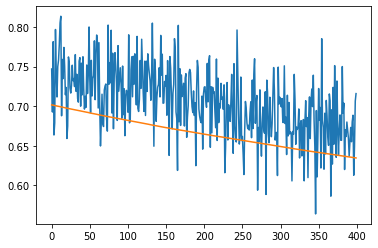

In [28]:
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.show()

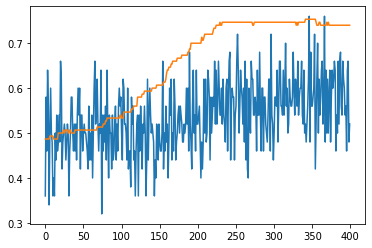

In [29]:
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.show()